# Chapter 1 - The Machine Learning Landscape

In [1]:
import os

# mengakses dataset dari folder datasets/lifesat
datapath = os.path.join("datasets", "lifesat", "")

In [2]:
# import libraries

# untuk visualisasi data
import matplotlib
import matplotlib.pyplot as plt

# untuk perhitungan scientific
import numpy as np

# untuk membantu mengelola data
import pandas as pd

In [3]:
# load dataset, dimasukkan ke pandas
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [4]:
# preview data 'oecd_bli'
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
5,DNK,Denmark,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
6,FIN,Finland,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.60,NaN,NaN
7,FRA,France,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.50,NaN,NaN
8,DEU,Germany,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.10,NaN,NaN
9,GRC,Greece,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.70,NaN,NaN


In [5]:
# preview data 'gdp_per_capita'
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Kita akan menampilkan grafik `Gdp per capita` dan `Life satisfaction` dari suatu negara berdasarkan data gabungan dari 'oecd_bli' dan 'gdp_per_capita'  

In [6]:
# fungsi menggabungkan data 'oecd_bli' dan 'gdp_per_capita'
def prepare_country_stats(oecd_bli, gdp_per_capita):
    # mengambil data yang nilai column "INEQUALITY" = "TOT"
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # membuat tabel baru dengan index adalah "Country" dan column-nya "Indicator" dengan nilainya dari "Values"
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    
    # mengganti nama column "2015" menjadi "GDP per capita"
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # merubah index menjadi column "Country"
    gdp_per_capita.set_index("Country", inplace=True)
    
    # menggabungkan tabel 'oecd_bli' dan 'gdp_per_capita'
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    
    # menghapus beberapa data yang ber-index 0, 1, 6, 8, 33, 34, 35
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [7]:
# apply `prepare_country_stats` function
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

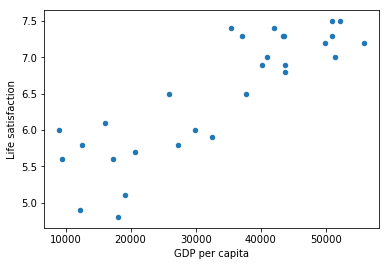

In [8]:
# visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
# import library dari Scikit-learn
import sklearn.linear_model

# select a linear model
model = sklearn.linear_model.LinearRegression()

In [10]:
# menentukan column "GDP per capita" sebagai train data dengan label column "Life satisfaction"
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [11]:
# melakukan training data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# membuat prediksi untuk negara Cyprus dengan nilai GDP = 22587
X_new = [[22587]] # Cyprus GDP per capita
print(model.predict(X_new))

[[ 5.96242338]]
